In [1]:
from sklearn import datasets
import pandas as pd

In [4]:
iris = datasets.load_iris()
labels = pd.DataFrame(iris.target)
labels.columns = ['labels']
data = pd.DataFrame(iris.data)
data.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
data = pd.concat([data, labels], axis = 1)

In [7]:
data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
feature = data[['Sepal length', 'Sepal width', 'Petal length', 'Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### DBSACAN

In [10]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
model = DBSCAN(eps=0.3, min_samples=5)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns = ['predict']

In [25]:
r = pd.concat([feature, predict], axis=1)
print(r)

     Sepal length  Sepal width  Petal length  Petal width  predict
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3       -1
146           6.3          2.5           5.0          1.9       -1
147           6.5          3.0           5.2          2.0       -1
148           6.2          3.4           5.4          2.3       -1
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


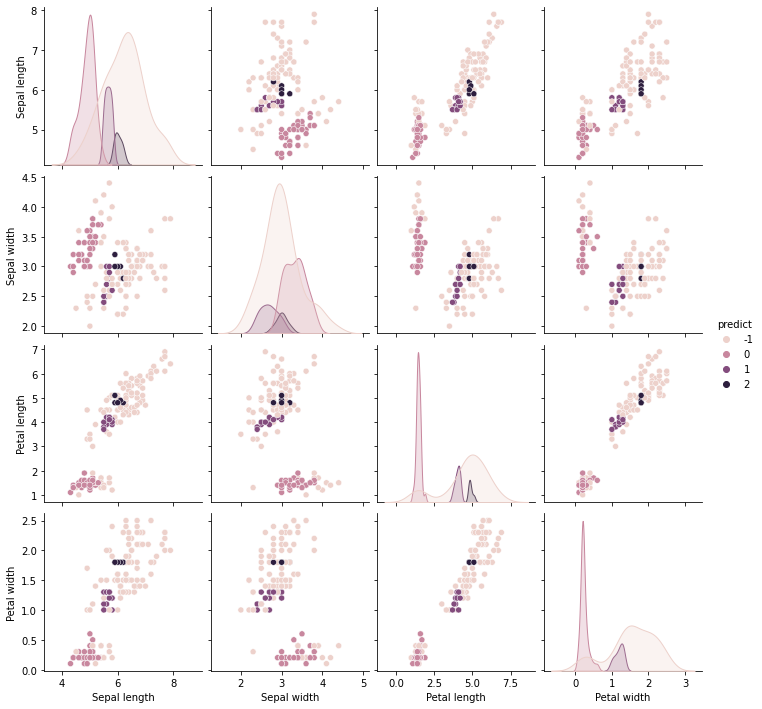

In [26]:
sns.pairplot(r, hue='predict')
plt.show()

### 실제 데이터

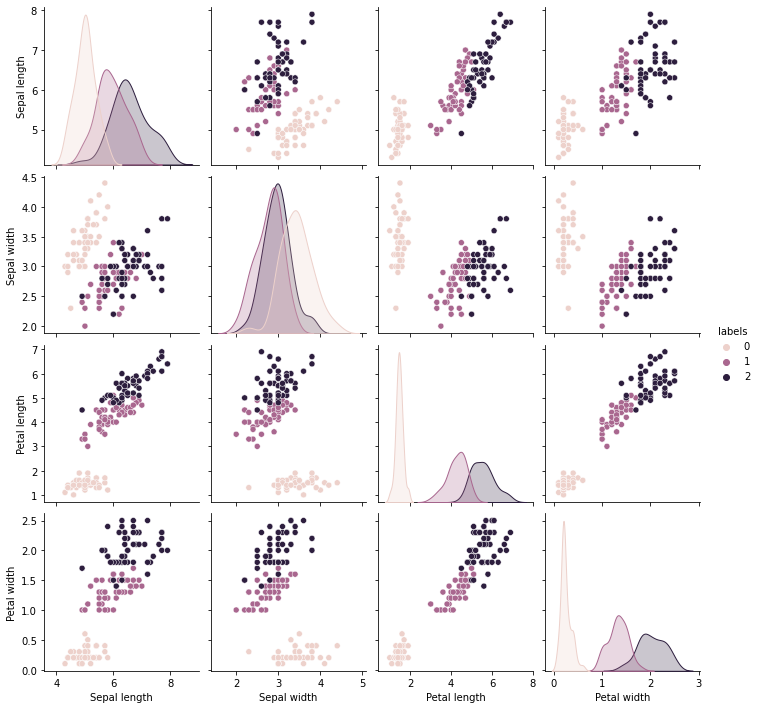

In [15]:
sns.pairplot(data, hue='labels')
plt.show()

### K-means

In [16]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, n_jobs=4, random_state=21)
km.fit(feature)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=4, random_state=21)

In [17]:
new_labels = pd.DataFrame(km.labels_)
new_labels.columns = ['predict']

In [18]:
r2 = pd.concat([feature, new_labels], axis=1)

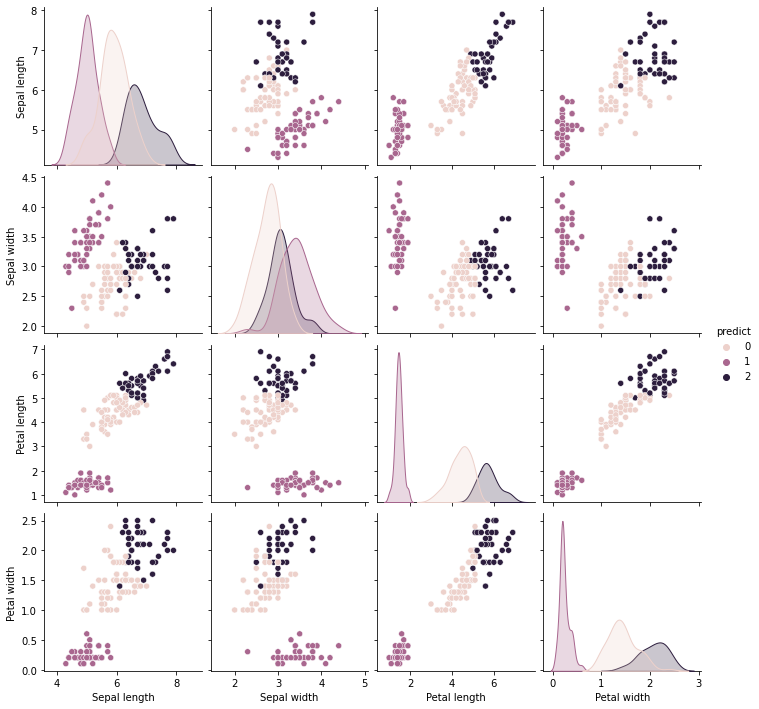

In [20]:
sns.pairplot(r2, hue = 'predict')
plt.show()

In [27]:
import numpy as np
import sklearn.cluster as cluster
import time

In [29]:
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha':0.25, 's':80, 'linewidths':0}

In [30]:
data = np.load('./data/clusterable_data.npy')

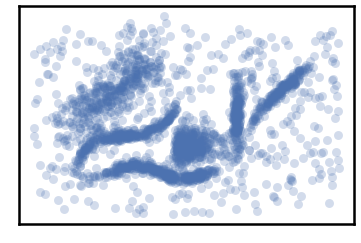

In [31]:
plt.scatter(data.T[0], data.T[1], c = 'b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [34]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    
    palette = sns.color_palette('deep', np.unique(labels).max()+1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]

    plt.scatter(data.T[0], data.T[1], c = colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
    plt.title(f'Clusters found by {str(algorithm.__name__)}', fontsize=24)
    plt.text(-0.5, 0.7, f'Clustering took {end_time - start_time: .2f}s', fontsize=14)

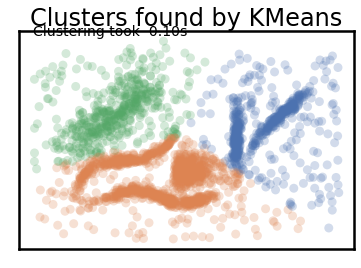

In [35]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':3})

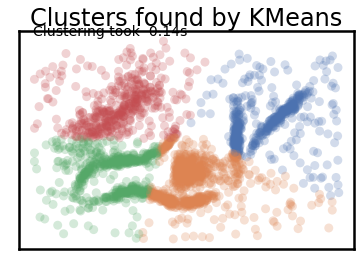

In [36]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':4})

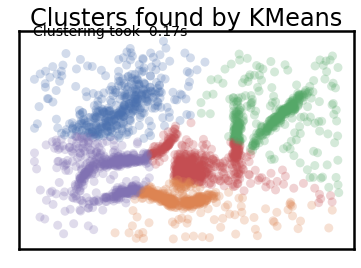

In [37]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':5})

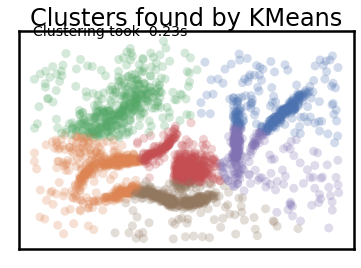

In [38]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

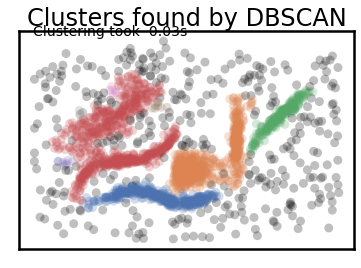

In [39]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.025})

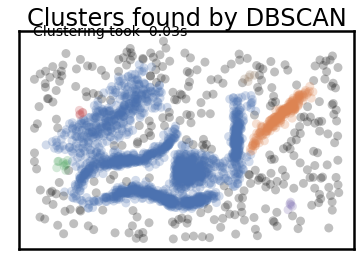

In [40]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.03})

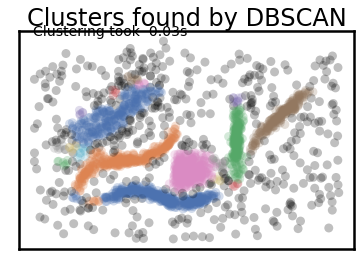

In [41]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.02})

In [42]:
dbs = DBSCAN(eps=0.03)
dbs2 = dbs.fit(data)
dbs2.labels_

array([ 0,  0,  0, ..., -1, -1,  0], dtype=int64)

### HDBSCAN
- DBSCAN의 발전된 버전, 하이퍼 파라미터에 덜 민감함

In [43]:
import hdbscan

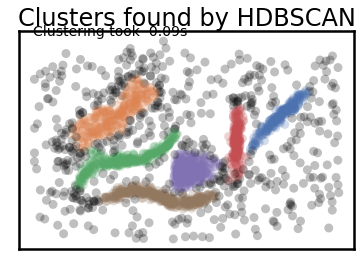

In [45]:
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})